In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("ttrain.csv")
df2=pd.read_csv("ttest.csv")

In [3]:
df1.shape #Column 12th shows the survivors

(891, 12)

In [4]:
df2.shape #Column 11th does not show survivors

(418, 11)

In [5]:
#We will combine this data and try to estimate the survivors

In [6]:
df=df1.append(df2)

In [7]:
df.shape

(1309, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean()) 
#Fills in the blanks with the mean for the Fare column

In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df['Embarked'].value_counts() #Shows which seaport you boarded from

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
df['Embarked'].mode()
#What can we fill the empty ones with here? We look at the mode possibility
#and say it is one of these 3 ports and fill it.
#The highest value is found with the mode

0    S
Name: Embarked, dtype: object

In [14]:
df['Embarked'] = df['Embarked'].fillna('S')# we  fill in the blanks

In [15]:
df.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

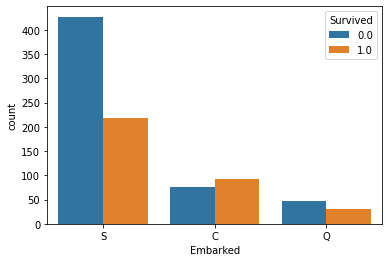

In [17]:
sns.countplot(x='Embarked',hue="Survived",data=df) 
#0: dead, 1: survivors

In [18]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
486,487,1.0,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.000,C93,S
308,1200,NaN,1,"Hays, Mr. Charles Melville",male,55.0,1,1,12749,93.500,B69,S
577,578,1.0,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.900,E44,S
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.000,NaN,S
468,469,0.0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.725,NaN,Q


# 

In [19]:
#We want to remove Ms, Mr parts in these names

In [20]:
#Featuring 
#Find the first space,take the part until you see the dot
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)


In [21]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [22]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [23]:
#Mlle 
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Col','Major','Dr','Capt'],'Mr')


In [24]:
df['Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [25]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [26]:
del df['Cabin']

In [27]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

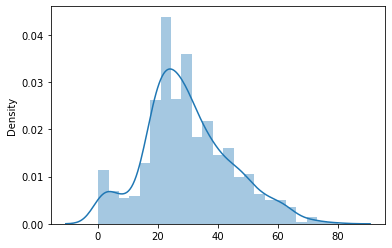

In [28]:
sns.distplot(x=df['Age']);

In [29]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [30]:
df.groupby('Sex')['Age'].mean() #The sum of the ages of women and men

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [31]:
#We group by title,averaged age by age,then filled the age column with the 
#average age of unmarried girls

In [32]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform("median"))

In [33]:
df['Family']=df['SibSp'] + df['Parch'] +1 
#a person's family number;when you add the number of siblings,the 
#number of mother,father and himself

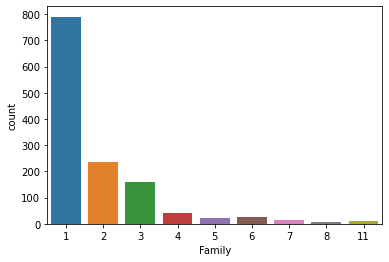

In [34]:
sns.countplot(df['Family']);

In [35]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Family           0
dtype: int64

In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Family'],
      dtype='object')

In [37]:
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)

In [38]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
546,1.0,2,female,19.0,1,0,26.0,S,Mrs,2


In [39]:
data=pd.get_dummies(df,drop_first=True) 

In [40]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,NaN,3,30.0,0,0,8.0500,1,1,0,1,0,1,0


In [41]:
train=data[:891] #we split the data back
test=data[891:]

In [42]:
y=train['Survived']

In [43]:
x=train.drop('Survived',axis=1) 

In [44]:
test=test.drop('Survived',axis=1)

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [46]:
g= GaussianNB()
b= BernoulliNB()

In [47]:
g.fit(x,y)

GaussianNB()

In [48]:
pred=g.predict(test)

In [49]:
pred 

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [50]:
result= df2[['PassengerId']]

In [51]:
result['Survived']=pred;

In [52]:
result.head()

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0


In [53]:
result['Survived'] =result['Survived'].astype('int32');

In [54]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [55]:
result.to_csv('titanicGaussian_tahmin.csv',index=False) 
#we will upload kaggle

In [56]:
b.fit(x,y)

BernoulliNB()

In [57]:
predBer=b.predict(test)

In [58]:
resultBer= df2[['PassengerId']]

In [59]:
resultBer['Survived']=predBer

In [60]:
resultBer['Survived'] =resultBer['Survived'].astype('int32')
resultBer.to_csv('titanicBer_tahmin.csv',index=False)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
k= KNeighborsClassifier()

In [62]:
k.fit(x,y)

KNeighborsClassifier()

In [63]:
predKNeig=k.predict(test)

In [64]:
resultKNeig= df2[['PassengerId']]
resultKNeig['Survived']=predKNeig
resultKNeig['Survived'] =resultKNeig['Survived'].astype('int32')
resultKNeig.to_csv('titanicKNeig_tahmin.csv',index=False)

In [65]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [66]:
l.fit(x,y)

LogisticRegression()

In [67]:
predLogRec=l.predict(test)

In [68]:
resultLogRec= df2[['PassengerId']]
resultLogRec['Survived']=predLogRec
resultLogRec['Survived'] =resultLogRec['Survived'].astype('int32')
resultLogRec.to_csv('titanicLogRec_tahmin.csv',index=False);

In [69]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [70]:
d.fit(x,y)
predDecTree=d.predict(test)
resultDecTree= df2[['PassengerId']]
resultDecTree['Survived']=predDecTree
resultDecTree['Survived'] =resultDecTree['Survived'].astype('int32')
resultDecTree.to_csv('titanicDecTree_tahmin.csv',index=False);

In [71]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [73]:
r.fit(x,y)
predRandomFor=r.predict(test)
resultRandomFor= df2[['PassengerId']]
resultRandomFor['Survived']=predRandomFor
resultRandomFor['Survived'] =resultRandomFor['Survived'].astype('int32')
resultRandomFor.to_csv('titanicRandomFor_tahmin.csv',index=False);

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
h= GradientBoostingClassifier()

In [ ]:
h.fit(x,y)
predGradientBoost=h.predict(test)
resultGradientBoost= df2[['PassengerId']]
resultGradientBoost['Survived']=predGradientBoost
resultGradientBoost['Survived'] =resultGradientBoost['Survived'].astype('int32')
resultGradientBoost.to_csv('titanicGradientBoost_tahmin.csv',index=False);